# Bank Personal Loan Modelling

In [1]:
### Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import math

In [2]:
BankData=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
BankData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
BankData.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
BankData.shape

(5000, 14)

In [6]:
BankData.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
BankData.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [8]:
BankData.describe(include='all')

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
BankData.shape

(5000, 12)

In [10]:
BankData[BankData['Experience']< 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,2,7.20,1,0,0,1,0,0,1


In [11]:
BankData[BankData< 0] = 0 


In [12]:
BankData[BankData['Experience']< 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [13]:
BankData.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.119600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.440484,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [14]:
BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [15]:
BankData.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>],
       [<AxesSubplot:title={'center':'CD Account'}>,
        <AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>]], dtype=object)

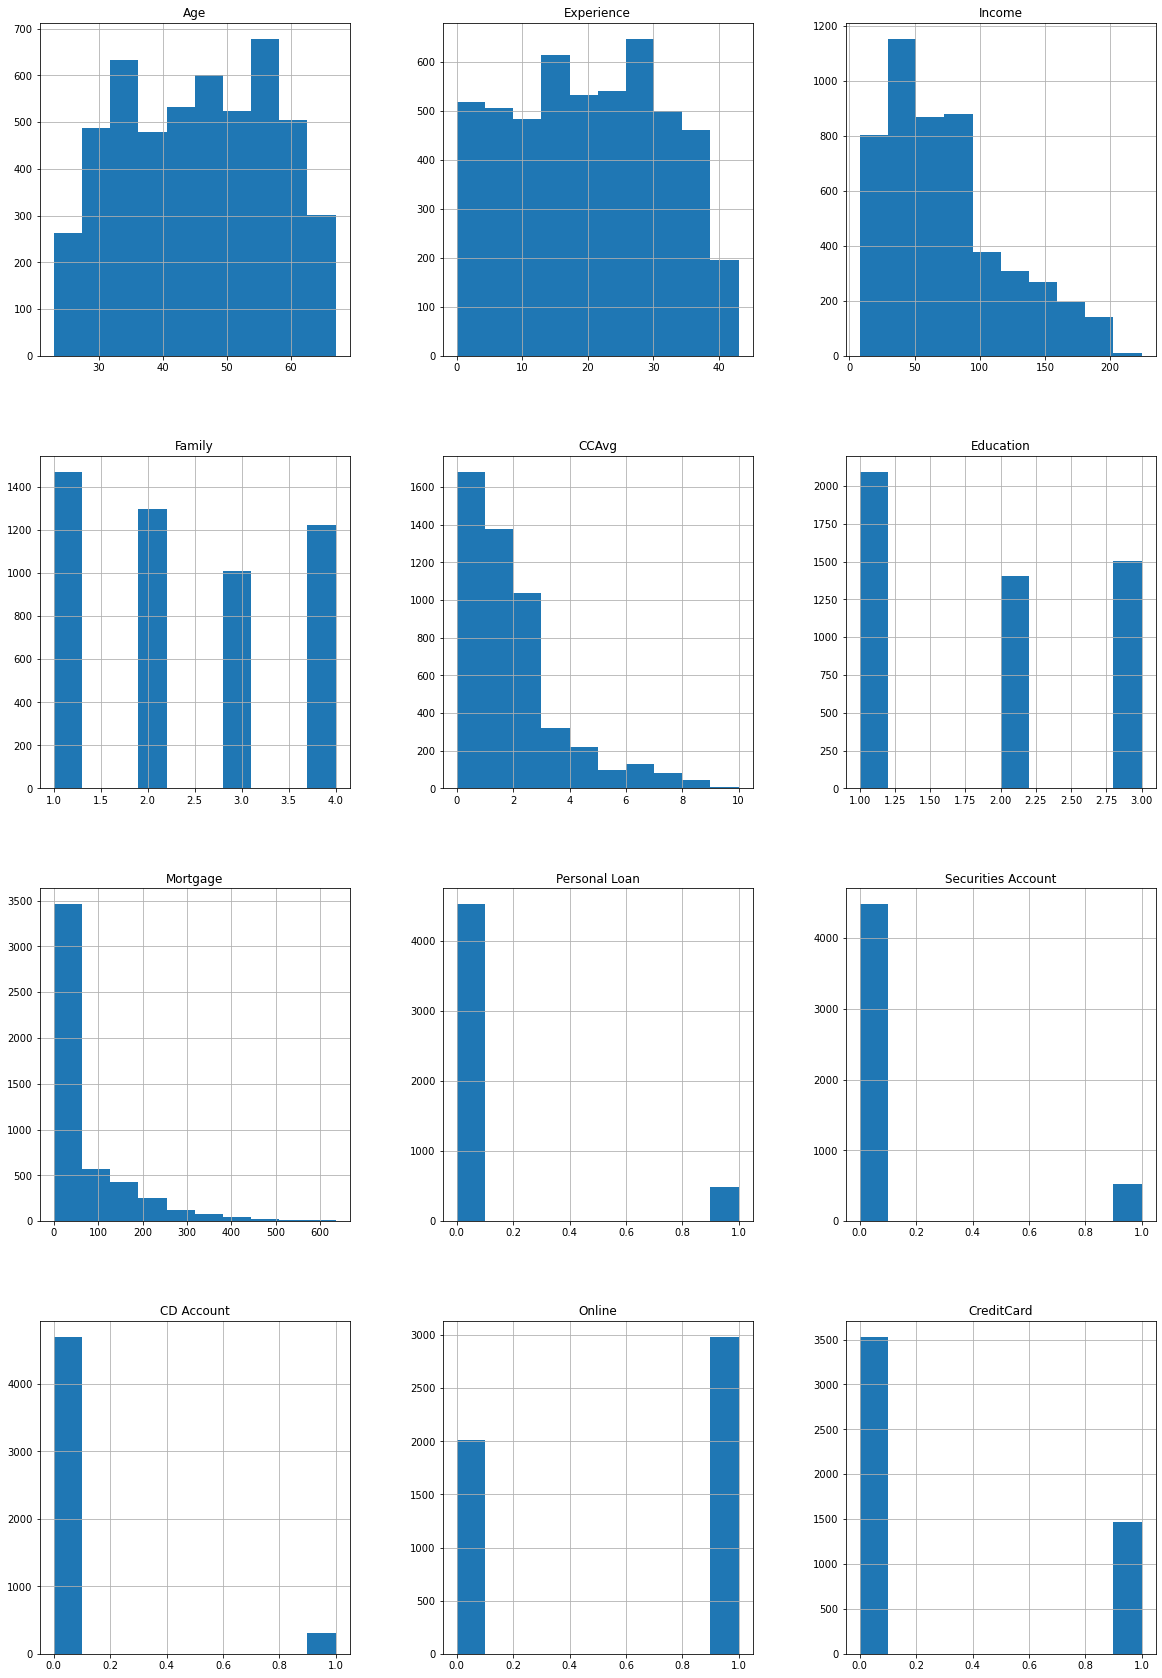

In [16]:
BankData.hist(figsize=(20,30))

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

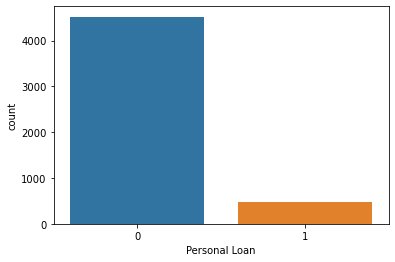

In [17]:
sns.countplot(x='Personal Loan', data=BankData)

In [18]:
pd.crosstab(BankData['Personal Loan'],BankData['Education'])

Education,1,2,3
Personal Loan,,,
0,2003,1221,1296
1,93,182,205


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

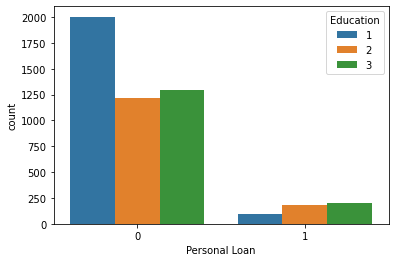

In [19]:
sns.countplot(x='Personal Loan',hue='Education', data=BankData)

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

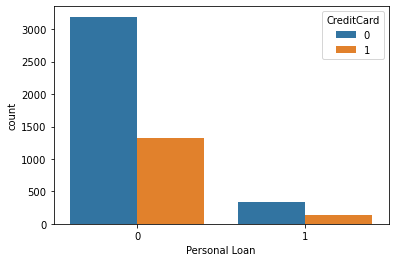

In [20]:
sns.countplot(x='Personal Loan',hue='CreditCard', data=BankData)

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

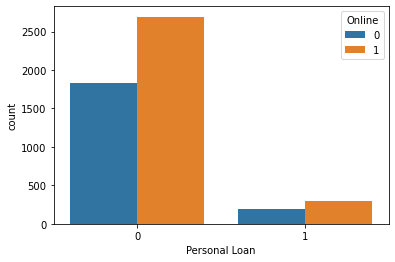

In [21]:
sns.countplot(x='Personal Loan',hue='Online', data=BankData)

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

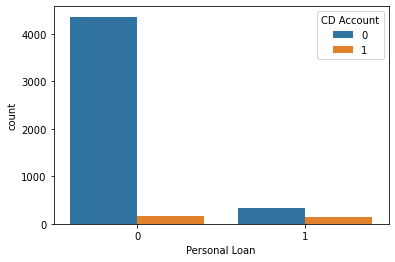

In [22]:
sns.countplot(x='Personal Loan',hue='CD Account', data=BankData)

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

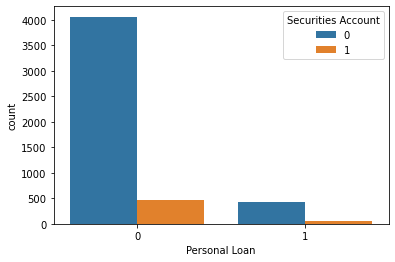

In [23]:
sns.countplot(x='Personal Loan',hue='Securities Account', data=BankData)

<AxesSubplot:xlabel='Family', ylabel='count'>

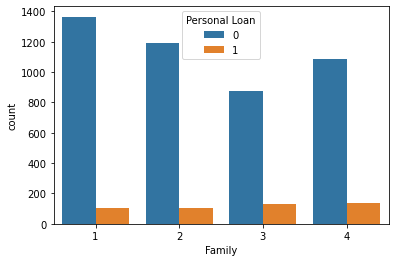

In [24]:
sns.countplot(hue='Personal Loan',x='Family', data=BankData)

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

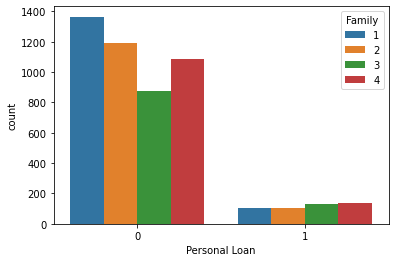

In [25]:
sns.countplot(x='Personal Loan',hue='Family', data=BankData)

In [26]:
pd.pivot_table(BankData,['Age','Experience','Income'], index=['Personal Loan'])

,Age,Experience,Income
Personal Loan,,,
0,45.367257,20.148894,66.237389
1,45.066667,19.843750,144.745833


In [27]:
pd.pivot_table(BankData,['Age','Experience','Income'], index=['Personal Loan'],columns=['CreditCard'], aggfunc=len)

Age       Experience       Income      
CreditCard        0     1          0     1      0     1
Personal Loan                                          
0              3193  1327       3193  1327   3193  1327
1               337   143        337   143    337   143

In [28]:
#sns.pairplot(BankData,diag_kind='kde')

In [29]:
corr = BankData.corr()
corr

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994198,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994198,1.000000,-0.046729,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.055269,-0.046729,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052213,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049912,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013536,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010840,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007858,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001111,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010046,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<AxesSubplot:>

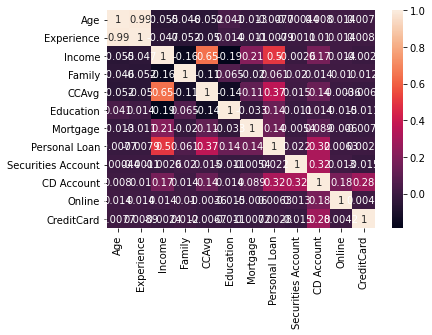

In [30]:
sns.heatmap(corr, annot=True)

In [31]:
Educ=pd.get_dummies(BankData['Education'],drop_first=True)
Educ.head()

,2,3
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0


In [32]:
BankData['Family']=BankData['Family'].replace({2:'Family_2',3:'Family_3', 4:'Family_4'})
BankData.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,Family_4,1.6,1,0,0,1,0,0,0
1,45,19,34,Family_3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,Family_4,1.0,2,0,0,0,0,0,1


In [33]:
family=pd.get_dummies(BankData['Family'],drop_first=True)
family.head()

,Family_2,Family_3,Family_4
0,0,0,1
1,0,1,0
2,0,0,0
3,0,0,0
4,0,0,1


In [34]:
BankData.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,Family_4,1.6,1,0,0,1,0,0,0
1,45,19,34,Family_3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,Family_4,1.0,2,0,0,0,0,0,1


In [35]:
BankData=pd.concat([BankData,family,Educ],axis=1)
BankData.drop(['Family','Education'],axis=1,inplace=True)

In [36]:
BankData.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,2,3
0,25,1,49,1.6,0,0,1,0,0,0,0,0,1,0,0
1,45,19,34,1.5,0,0,1,0,0,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,0,1,0,0,1,1,0


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
X=BankData.drop("Personal Loan",axis=1)
y=BankData["Personal Loan"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [40]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
predictions=model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9606666666666667

In [43]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1343
           1       0.92      0.69      0.79       157

    accuracy                           0.96      1500
   macro avg       0.94      0.84      0.88      1500
weighted avg       0.96      0.96      0.96      1500



In [44]:
from sklearn.metrics import confusion_matrix    #Actual(0,1)-rows    Predicted(0,1)-columns
confusion_matrix(y_test,predictions)

array([[1333,   10],
       [  49,  108]], dtype=int64)

<AxesSubplot:>

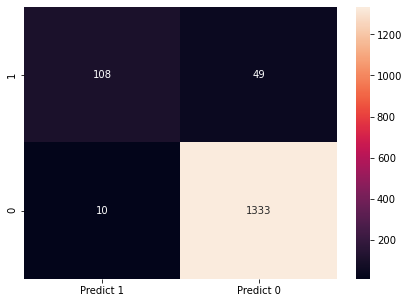

In [45]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dTree=DecisionTreeClassifier(criterion='gini',random_state=1)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [48]:
print(dTree.score(X_train,y_train))
print(dTree.score(X_test,y_test))

1.0
0.9806666666666667


# Regularization

In [49]:
dTreeR=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
dTreeR.fit(X_train,y_train)
print(dTreeR.score(X_train,y_train))
print(dTreeR.score(X_test,y_test))

0.9688571428571429
0.97


0.97


<AxesSubplot:>

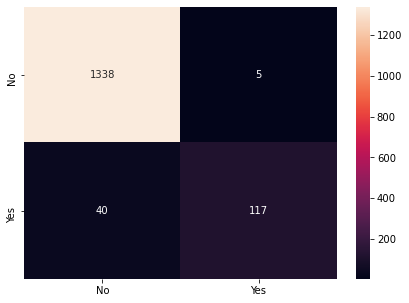

In [50]:
y_predict = dTreeR.predict(X_test)
print(dTreeR.score(X_test,y_test))
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True , fmt='g')

# Bagging

In [51]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,base_estimator=dTree,random_state=1)

bgcl = bgcl.fit(X_train,y_train)


0.9873333333333333


<AxesSubplot:>

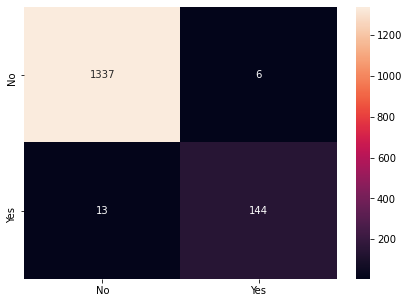

In [52]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test,y_test))
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True , fmt='g')

# Boosting

In [54]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=30,random_state=1)

abcl = abcl.fit(X_train,y_train)


0.9686666666666667


<AxesSubplot:>

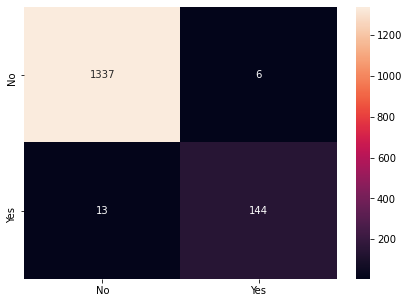

In [55]:
y_predict = bgcl.predict(X_test)
print(abcl.score(X_test,y_test))
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True , fmt='g')

# Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(n_estimators=10,random_state=1)

gbcl = gbcl.fit(X_train,y_train)

0.9673333333333334


<AxesSubplot:>

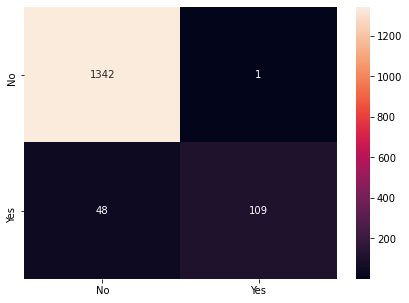

In [57]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test,y_test))
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True , fmt='g')

# ROC & AUC Comparision

In [59]:
from sklearn. metrics import roc_auc_score,auc
from sklearn. metrics import roc_curve

In [62]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, model.predict_proba(X_test) [:, 1])
logit_roc_auc1=roc_auc_score(y_test,model.predict(X_test))
roc_auc1 = auc(fpr1, tpr1)

In [63]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, dTree.predict_proba(X_test) [:, 1])
logit_roc_auc2=roc_auc_score(y_test,dTree.predict(X_test))
roc_auc2 = auc(fpr2, tpr2)

In [64]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, dTreeR.predict_proba(X_test) [:, 1])
logit_roc_auc3=roc_auc_score(y_test,dTreeR.predict(X_test))
roc_auc3 = auc(fpr3, tpr3)

In [65]:
fpr4, tpr4, thresholds4 = roc_curve(y_test, bgcl.predict_proba(X_test) [:, 1])
logit_roc_auc4=roc_auc_score(y_test,bgcl.predict(X_test))
roc_auc4 = auc(fpr4, tpr4)

In [66]:
fpr5, tpr5, thresholds5 = roc_curve(y_test, abcl.predict_proba(X_test) [:, 1])
logit_roc_auc5=roc_auc_score(y_test,abcl.predict(X_test))
roc_auc5 = auc(fpr5, tpr5)

In [67]:
fpr6, tpr6, thresholds6 = roc_curve(y_test, gbcl.predict_proba(X_test) [:, 1])
logit_roc_auc6=roc_auc_score(y_test,gbcl.predict(X_test))
roc_auc6 = auc(fpr6, tpr6)

<Figure size 432x288 with 0 Axes>

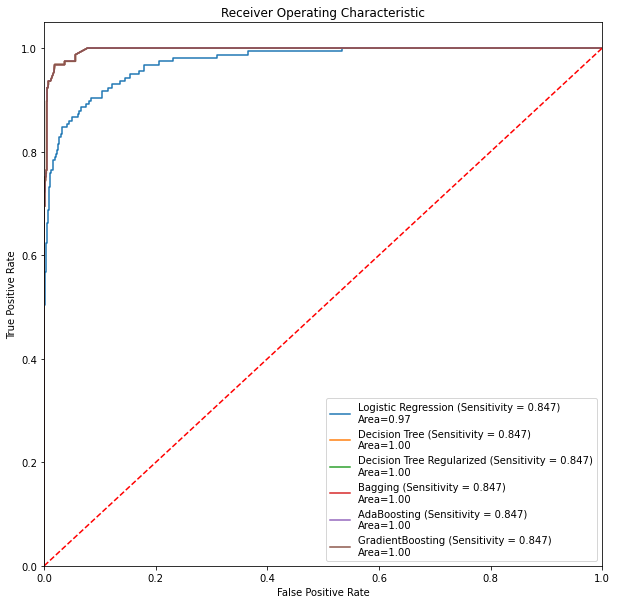

In [68]:
import matplotlib.pyplot as plt
plt.figure( )
plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1, label= 'Logistic Regression (Sensitivity = %0.3f)' % logit_roc_auc1 + "\nArea=%0.2f" % roc_auc1)
plt.plot(fpr2, tpr2, label= 'Decision Tree (Sensitivity = %0.3f)' % logit_roc_auc2 + "\nArea=%0.2f" % roc_auc2)
plt.plot(fpr3, tpr3, label= 'Decision Tree Regularized (Sensitivity = %0.3f)' % logit_roc_auc3 + "\nArea=%0.2f" % roc_auc3)
plt.plot(fpr4, tpr4, label= 'Bagging (Sensitivity = %0.3f)' % logit_roc_auc4 + "\nArea=%0.2f" % roc_auc4)
plt.plot(fpr5, tpr5, label= 'AdaBoosting (Sensitivity = %0.3f)' % logit_roc_auc5 + "\nArea=%0.2f" % roc_auc5)
plt.plot(fpr6, tpr6, label= 'GradientBoosting (Sensitivity = %0.3f)' % logit_roc_auc6 + "\nArea=%0.2f" % roc_auc6)
plt.plot ([0, 1], [0, 1], 'r--' )
plt.xlim( [0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel( 'False Positive Rate' )
plt.ylabel( 'True Positive Rate' )
plt.title('Receiver Operating Characteristic' )
plt.legend (loc="lower right")
#plt.savefig ( 'Log_ROC')
 
plt.show( )